Create a word-document matrix (A) from a text dataset. If the vocabulary (set of unique words) size is M and the number of documents is N, then the size of this matrix will be M X N. Use numpy data structures to create and manipulate this matrix.

In [133]:
import numpy as np
import os
from collections import Counter
import re
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# consolidating all 20 files in a list
path = "C:/Users/hardi/Documents/Bhavya/IUPUI/Assignments/INFO-H-518/Assignments/Assignment1/Assignment1_data/Assignment1_data" 
text = [open(os.path.join(path, filename), "r" ,encoding="cp1252").read() for filename in os.listdir(path)]
documents = []
"""
Assumptions for creating the vocabulary

Alphabetic Words: Including words consisting of letters even if it is one letter word.

Numbers: Including numeric values as a word.

Hyphenated Words: Breaking them into separate words.

Apostrophes in Contractions: Treating contractions like "can't" as one word.

"""
documents=text[:]
for i, doc in enumerate(text):
    # print(i,doc)
    content=""
    for word in doc.split():
        word=word.lower()
        if word[0].isnumeric(): re.sub(",","  ",word)
        word1="".join(c for c in word if c.isalnum() or c == "'" or c == "-" or c == " ")
        if "'s" in word1: word1=word1.replace("'s","")
        if "-" in word1: word1=word1.replace("-"," ")
        if word1.startswith("'"): word1=word1.replace("'","")
        content=content+" "+word1
    documents[i]=content

# print(len(documents[2].split()),"\n")
# print(documents)


In [135]:
vocabulary = set(word for doc in documents for word in doc.split())
vocabulary = list(vocabulary)
vocabulary.sort()
#print(vocabulary)
M = len(vocabulary)  # Vocabulary size
#print(M)

In [136]:
N = len(documents)  # Number of documents
#print(N)

In [137]:
A = np.zeros((M, N), dtype=int)  # Matrix with M rows (words) and N columns (documents)

for i, doc in enumerate(documents):
    # print(i, doc)
    word_counts = Counter(doc.split())  # Count word occurrences in each document
    #print(word_counts)
    for word, count in word_counts.items():
        # if word in vocabulary:
        word_index = vocabulary.index(word)  # Find the word's index in the vocabulary
        A[word_index, i] = count  # Fill the corresponding cell in the matrix

#print(A)

1. Show the matrix A: report M and N

In [138]:
# Get the dimensions M and N
M, N = A.shape
# Report M and N
print("\nM (Vocabulary Size):", M)
print("N (Number of Documents):", N)

# Show the matrix A
print("\nWord-Document Matrix A:")
print(A)



M (Vocabulary Size): 1152
N (Number of Documents): 20

Word-Document Matrix A:
[[1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [139]:
#For clear view of matrix

df = pd.DataFrame(A,index = vocabulary, columns = list(range(1,21)))
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
10,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
100000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
15,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0
you'll,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
young,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
your,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


2. Visualize the matrix: Use heatmap like visualization to display the word-document matrix (higher frequency should be denoted by a darker shade)

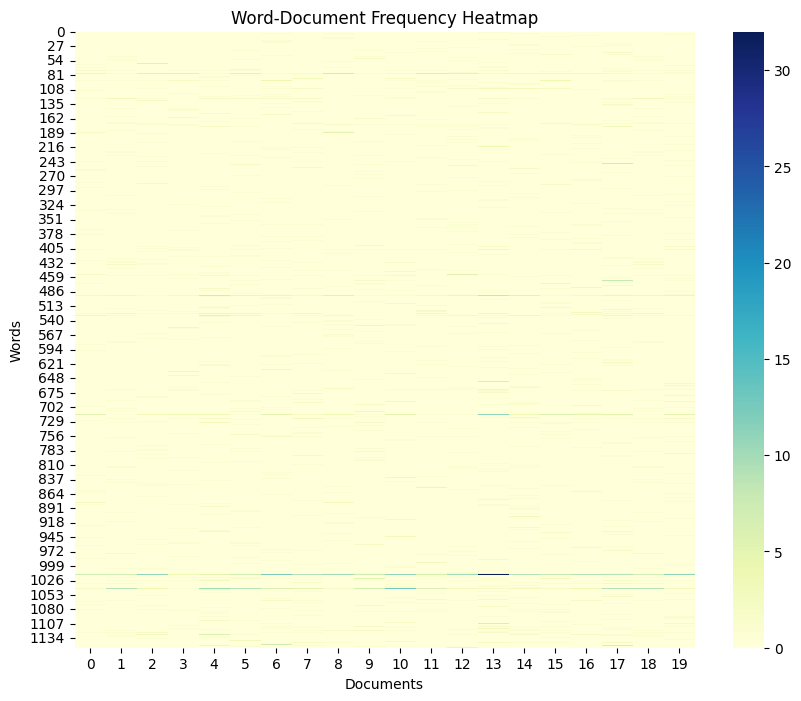

In [149]:
# Setting figure size
plt.figure(figsize=(10, 8))

#Creating HeatMap
sns.heatmap(A, cmap="YlGnBu", annot=False)
plt.xlabel("Documents")
plt.ylabel("Words")
plt.title("Word-Document Frequency Heatmap")
plt.show()

3. Using the matrix compute TF-IDF scores for each word

In [143]:
# Calculate Term Frequency (TF)
tf_vector = np.sum(A > 0, axis=1)

# Calculate Inverse Document Frequency (IDF)
idf_vector = np.log(len(documents) / (1 + tf_vector))

# Calculate TF-IDF matrix
tfidf_matrix = A * idf_vector[:, np.newaxis]

# Display dimensions M and N
M, N = tfidf_matrix.shape
print("\nM (Vocabulary Size):", M)
print("N (Number of Documents):", N)

# Display TF-IDF Matrix
print("\nTF-IDF Matrix:")
print(tfidf_matrix, "\n\n\n")

#For clear view of matrix

df = pd.DataFrame(tfidf_matrix,index = vocabulary, columns = list(range(1,21)))
df


M (Vocabulary Size): 1152
N (Number of Documents): 20

TF-IDF Matrix:
[[1.38629436 0.         0.         ... 0.         0.         1.38629436]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.89711998 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 





,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
10,1.386294,0.0,0.0,0.0,0.000000,0.00000,1.386294,1.386294,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.386294
100000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,2.302585,0.000000,0.0,0.0,0.000000,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,1.897120,0.000000,0.0,0.0,1.897120,0.0,0.000000
15,0.000000,0.0,0.0,0.0,0.000000,0.00000,1.609438,0.000000,1.609438,0.00000,0.0,0.0,0.00000,0.000000,1.609438,0.0,0.0,0.000000,0.0,0.000000
150,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,2.302585,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you,0.000000,0.0,0.0,0.0,4.828314,0.00000,0.000000,1.609438,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,9.656627,0.0,0.000000
you'll,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,2.302585,0.0,0.000000
young,0.000000,0.0,0.0,0.0,0.000000,1.89712,0.000000,0.000000,0.000000,1.89712,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
your,0.000000,0.0,0.0,0.0,2.302585,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


4. Using cosine similarity (Links to an external site.) find the 3 most similar documents of "10.txt"

In [152]:
#Loading File Names
text_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".txt")]
#print(text_files)

# Compute cosine similarity using numpy
cosine_similarities = np.dot(A.T, A) / (
    np.linalg.norm(A.T, axis=1)[:, np.newaxis] * np.linalg.norm(A, axis=0)
)
#print(cosine_similarities)

# Find the three most similar documents to "10.txt"
query_document_index = text_files.index("C:/Users/hardi/Documents/Bhavya/IUPUI/Assignments/INFO-H-518/Assignments/Assignment1/Assignment1_data/Assignment1_data\\10.txt") if "C:/Users/hardi/Documents/Bhavya/IUPUI/Assignments/INFO-H-518/Assignments/Assignment1/Assignment1_data/Assignment1_data\\10.txt" in text_files else None
#print(query_document_index)

if query_document_index is not None:
    similarities_to_query = cosine_similarities[query_document_index]
    #print(similarities_to_query)
    
    # Get indices of three most similar documents
    most_similar_indices = np.argsort(similarities_to_query)[-4:-1][::-1]  # Exclude the document itself
    #print(most_similar_indices)

    # Display the most similar documents
    print("The three most similar documents to '10.txt' are:")
    for index in most_similar_indices:
        print(text_files[index].split("\\")[1], ":", similarities_to_query[index])
else:
    print("Error: '10.txt' not found in the dataset.")


The three most similar documents to '10.txt' are:
06.txt : 0.6070371916503828
11.txt : 0.5281341373478557
02.txt : 0.4833822564021013


5. Using matrix manipulation and numpy create a new matrix B of size N X N, where Bij will represent the number of common words between document i and j. Note: the diagonal of B should always have the highest value

In [153]:
# n=0
matrix=[]
for i in documents:
    # print("Scanning Document",n)
    n=n+1
    array1 = np.array(i.split())
    y=0
    for j in documents:
        # print("\tComparing with Document",y)
        y=y+1
        array2 = np.array(j.split())
        common_words = np.intersect1d(array1, array2)
        # print("\t\t",common_words)
        matrix.append(len(common_words))
# print(matrix)
B=np.array(matrix).reshape(N,N)
print(B)        

[[ 63  14  14  13  14  16  15  15  17  10  12  12   8  20  11  16   8  13
   14  15]
 [ 14  92  21  17  23  26  17  22  12  22  16  13  16  16  19  17  12  22
   92  19]
 [ 14  21  88  13  17  17  19  19   8  15  15  12  16  19  13  17  10  16
   21  17]
 [ 13  17  13  99  19  18  13  18  14  13  17  14  17  21  14  12  13  19
   17  16]
 [ 14  23  17  19 108  23  18  23  10  15  18  19  16  19  19  18  11  26
   23  21]
 [ 16  26  17  18  23 111  17  17  13  41  18  16  15  19  15  17  14  22
   26  22]
 [ 15  17  19  13  18  17 112  22  13  16  14  20  23  22  17  17  10  19
   17  23]
 [ 15  22  19  18  23  17  22  99  17  15  20  12  18  21  23  17  12  32
   22  23]
 [ 17  12   8  14  10  13  13  17  91  14  13  12  14  19  20  12  12  13
   12  16]
 [ 10  22  15  13  15  41  16  15  14  99  18  15  14  18  14  18  11  17
   22  20]
 [ 12  16  15  17  18  18  14  20  13  18  79  14  16  21  19  16  10  18
   16  19]
 [ 12  13  12  14  19  16  20  12  12  15  14  89  15  21  15  18

In [154]:
#For clear view of matrix 
df = pd.DataFrame(B,index  = list(range(1,21)), columns = list(range(1,21)))
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,63,14,14,13,14,16,15,15,17,10,12,12,8,20,11,16,8,13,14,15
2,14,92,21,17,23,26,17,22,12,22,16,13,16,16,19,17,12,22,92,19
3,14,21,88,13,17,17,19,19,8,15,15,12,16,19,13,17,10,16,21,17
4,13,17,13,99,19,18,13,18,14,13,17,14,17,21,14,12,13,19,17,16
5,14,23,17,19,108,23,18,23,10,15,18,19,16,19,19,18,11,26,23,21
6,16,26,17,18,23,111,17,17,13,41,18,16,15,19,15,17,14,22,26,22
7,15,17,19,13,18,17,112,22,13,16,14,20,23,22,17,17,10,19,17,23
8,15,22,19,18,23,17,22,99,17,15,20,12,18,21,23,17,12,32,22,23
9,17,12,8,14,10,13,13,17,91,14,13,12,14,19,20,12,12,13,12,16
10,10,22,15,13,15,41,16,15,14,99,18,15,14,18,14,18,11,17,22,20
